In [1]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual general para publicación
plt.rcParams.update({
    'font.size': 11,
    'font.family': 'serif',
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300
})

In [3]:
#Cargar el CSV en un DataFrame llamado "data"
df = pd.read_csv('data_limpia.csv')

#Mostrar las primeras 5 filas para inspeccionar la estructura
df.head()

,Facultad,Carrera,Día,H_Inicio,H_Salida,Profesor,Semestre,Total Estudiantes,Entrada,Salida,Proyecto
0,ICA,CIVIL,JUEVES,7,9,DOC_05,2020,63,7,15,1
1,ICA,CIVIL,MIERCOLES,7,9,DOC_05,2020,68,7,15,1
2,ICA,COMPUTACION,JUEVES,11,13,DOC_11,2020,17,7,15,1
3,FILO,P INFORMATICA,VIERNES,8,10,DOC_11,2020,6,7,15,1
4,ARQ,ARQUITECTURA,MARTES,7,9,DOC_12,2020,19,7,15,1


In [4]:
df['Semestre'] = df['Semestre'].astype(str).str.strip()

# Extraer año inicial y final, manejar casos con decimales
df['Año_Inicio'] = df['Semestre'].str[:2].str.replace('.0', '').astype(int) + 2000
df['Año_Fin'] = df['Semestre'].str[2:].str.replace('.0', '').astype(int) + 2000

# Opcional: crear campo "Periodo Académico"
df['Periodo_Academico'] = df['Año_Inicio'].astype(str) + "-" + df['Año_Fin'].astype(str)

In [5]:
# Seleccionar las columnas necesarias
columnas_deseadas = ['Facultad',
                     'Carrera',
                     'Día',
                     'H_Inicio',
                     'H_Salida',
                     'Año_Inicio',
                     'Año_Fin',
                     'Total Estudiantes',
                     'Proyecto',
                     'Entrada',
                     'Salida',
                     'Profesor']
df_filtrado = df[columnas_deseadas]

# Guardar el nuevo DataFrame en un archivo CSV
df_filtrado.to_csv('datos_cursos.csv', index=False)


In [6]:
from sklearn.preprocessing import LabelEncoder

df_cursos = pd.read_csv('datos_cursos.csv')

# Crear columna Tipo_Persona
df_cursos['Tipo_Persona'] = df_cursos['Profesor'].apply(
    lambda x: 'Docente' if 'DOC' in x.upper() else ('Asistente' if 'ASIS' in x.upper() else 'Desconocido')
)

# Asumimos que ya tienes df_filtrado y la columna 'Profesor' limpia
label_encoder = LabelEncoder()
df_cursos['Profesor_Codificado'] = label_encoder.fit_transform(df_cursos['Profesor'])

# Crear un DataFrame con los nombres y sus códigos
etiquetas_profesores = pd.DataFrame({
    'Profesor': label_encoder.classes_,
    'Codigo': range(len(label_encoder.classes_))
})

etiquetas_profesores.to_csv('etiquetas_profesores.csv', index=False)

df_cursos.drop(columns=['Profesor'], inplace=True)

df_cursos.head()

,Facultad,Carrera,Día,H_Inicio,H_Salida,Año_Inicio,Año_Fin,Total Estudiantes,Proyecto,Entrada,Salida,Tipo_Persona,Profesor_Codificado
0,ICA,CIVIL,JUEVES,7,9,2020,2020,63,1,7,15,Docente,4
1,ICA,CIVIL,MIERCOLES,7,9,2020,2020,68,1,7,15,Docente,4
2,ICA,COMPUTACION,JUEVES,11,13,2020,2020,17,1,7,15,Docente,10
3,FILO,P INFORMATICA,VIERNES,8,10,2020,2020,6,1,7,15,Docente,10
4,ARQ,ARQUITECTURA,MARTES,7,9,2020,2020,19,1,7,15,Docente,11


In [7]:
df_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Facultad             747 non-null    object
 1   Carrera              747 non-null    object
 2   Día                  747 non-null    object
 3   H_Inicio             747 non-null    int64 
 4   H_Salida             747 non-null    int64 
 5   Año_Inicio           747 non-null    int64 
 6   Año_Fin              747 non-null    int64 
 7   Total Estudiantes    747 non-null    int64 
 8   Proyecto             747 non-null    int64 
 9   Entrada              747 non-null    int64 
 10  Salida               747 non-null    int64 
 11  Tipo_Persona         747 non-null    object
 12  Profesor_Codificado  747 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 76.0+ KB


In [8]:
df_cursos.select_dtypes(include='object').nunique()

,0
Facultad,8
Carrera,20
Día,5
Tipo_Persona,1


In [9]:
import category_encoders as ce


# 1. Target Encoding para 'Carrera'
df_encoded = df_cursos.copy()
target_col = 'Profesor_Codificado'

# Aplicar Target Encoding a 'Carrera'
encoder = ce.TargetEncoder(cols=['Carrera'])
df_encoded['Carrera'] = encoder.fit_transform(df_encoded['Carrera'], df_encoded[target_col])

# 2. One-Hot Encoding para 'Día' y 'Facultad'
df_encoded = pd.get_dummies(df_encoded, columns=['Día', 'Facultad', 'Tipo_Persona'])

# Verifica resultado
df_encoded.head()

,Carrera,H_Inicio,H_Salida,Año_Inicio,Año_Fin,Total Estudiantes,Proyecto,Entrada,Salida,Profesor_Codificado,...,Día_VIERNES,Facultad_AGR,Facultad_ARQ,Facultad_CIENCIAS,Facultad_CQ,Facultad_FIGEMPA,Facultad_FILO,Facultad_ICA,Facultad_IQ,Tipo_Persona_Docente
0,7.218231,7,9,2020,2020,63,1,7,15,4,...,False,False,False,False,False,False,False,True,False,True
1,7.218231,7,9,2020,2020,68,1,7,15,4,...,False,False,False,False,False,False,False,True,False,True
2,6.977234,11,13,2020,2020,17,1,7,15,10,...,False,False,False,False,False,False,False,True,False,True
3,6.968400,8,10,2020,2020,6,1,7,15,10,...,True,False,False,False,False,False,True,False,False,True
4,5.836790,7,9,2020,2020,19,1,7,15,11,...,False,False,True,False,False,False,False,False,False,True


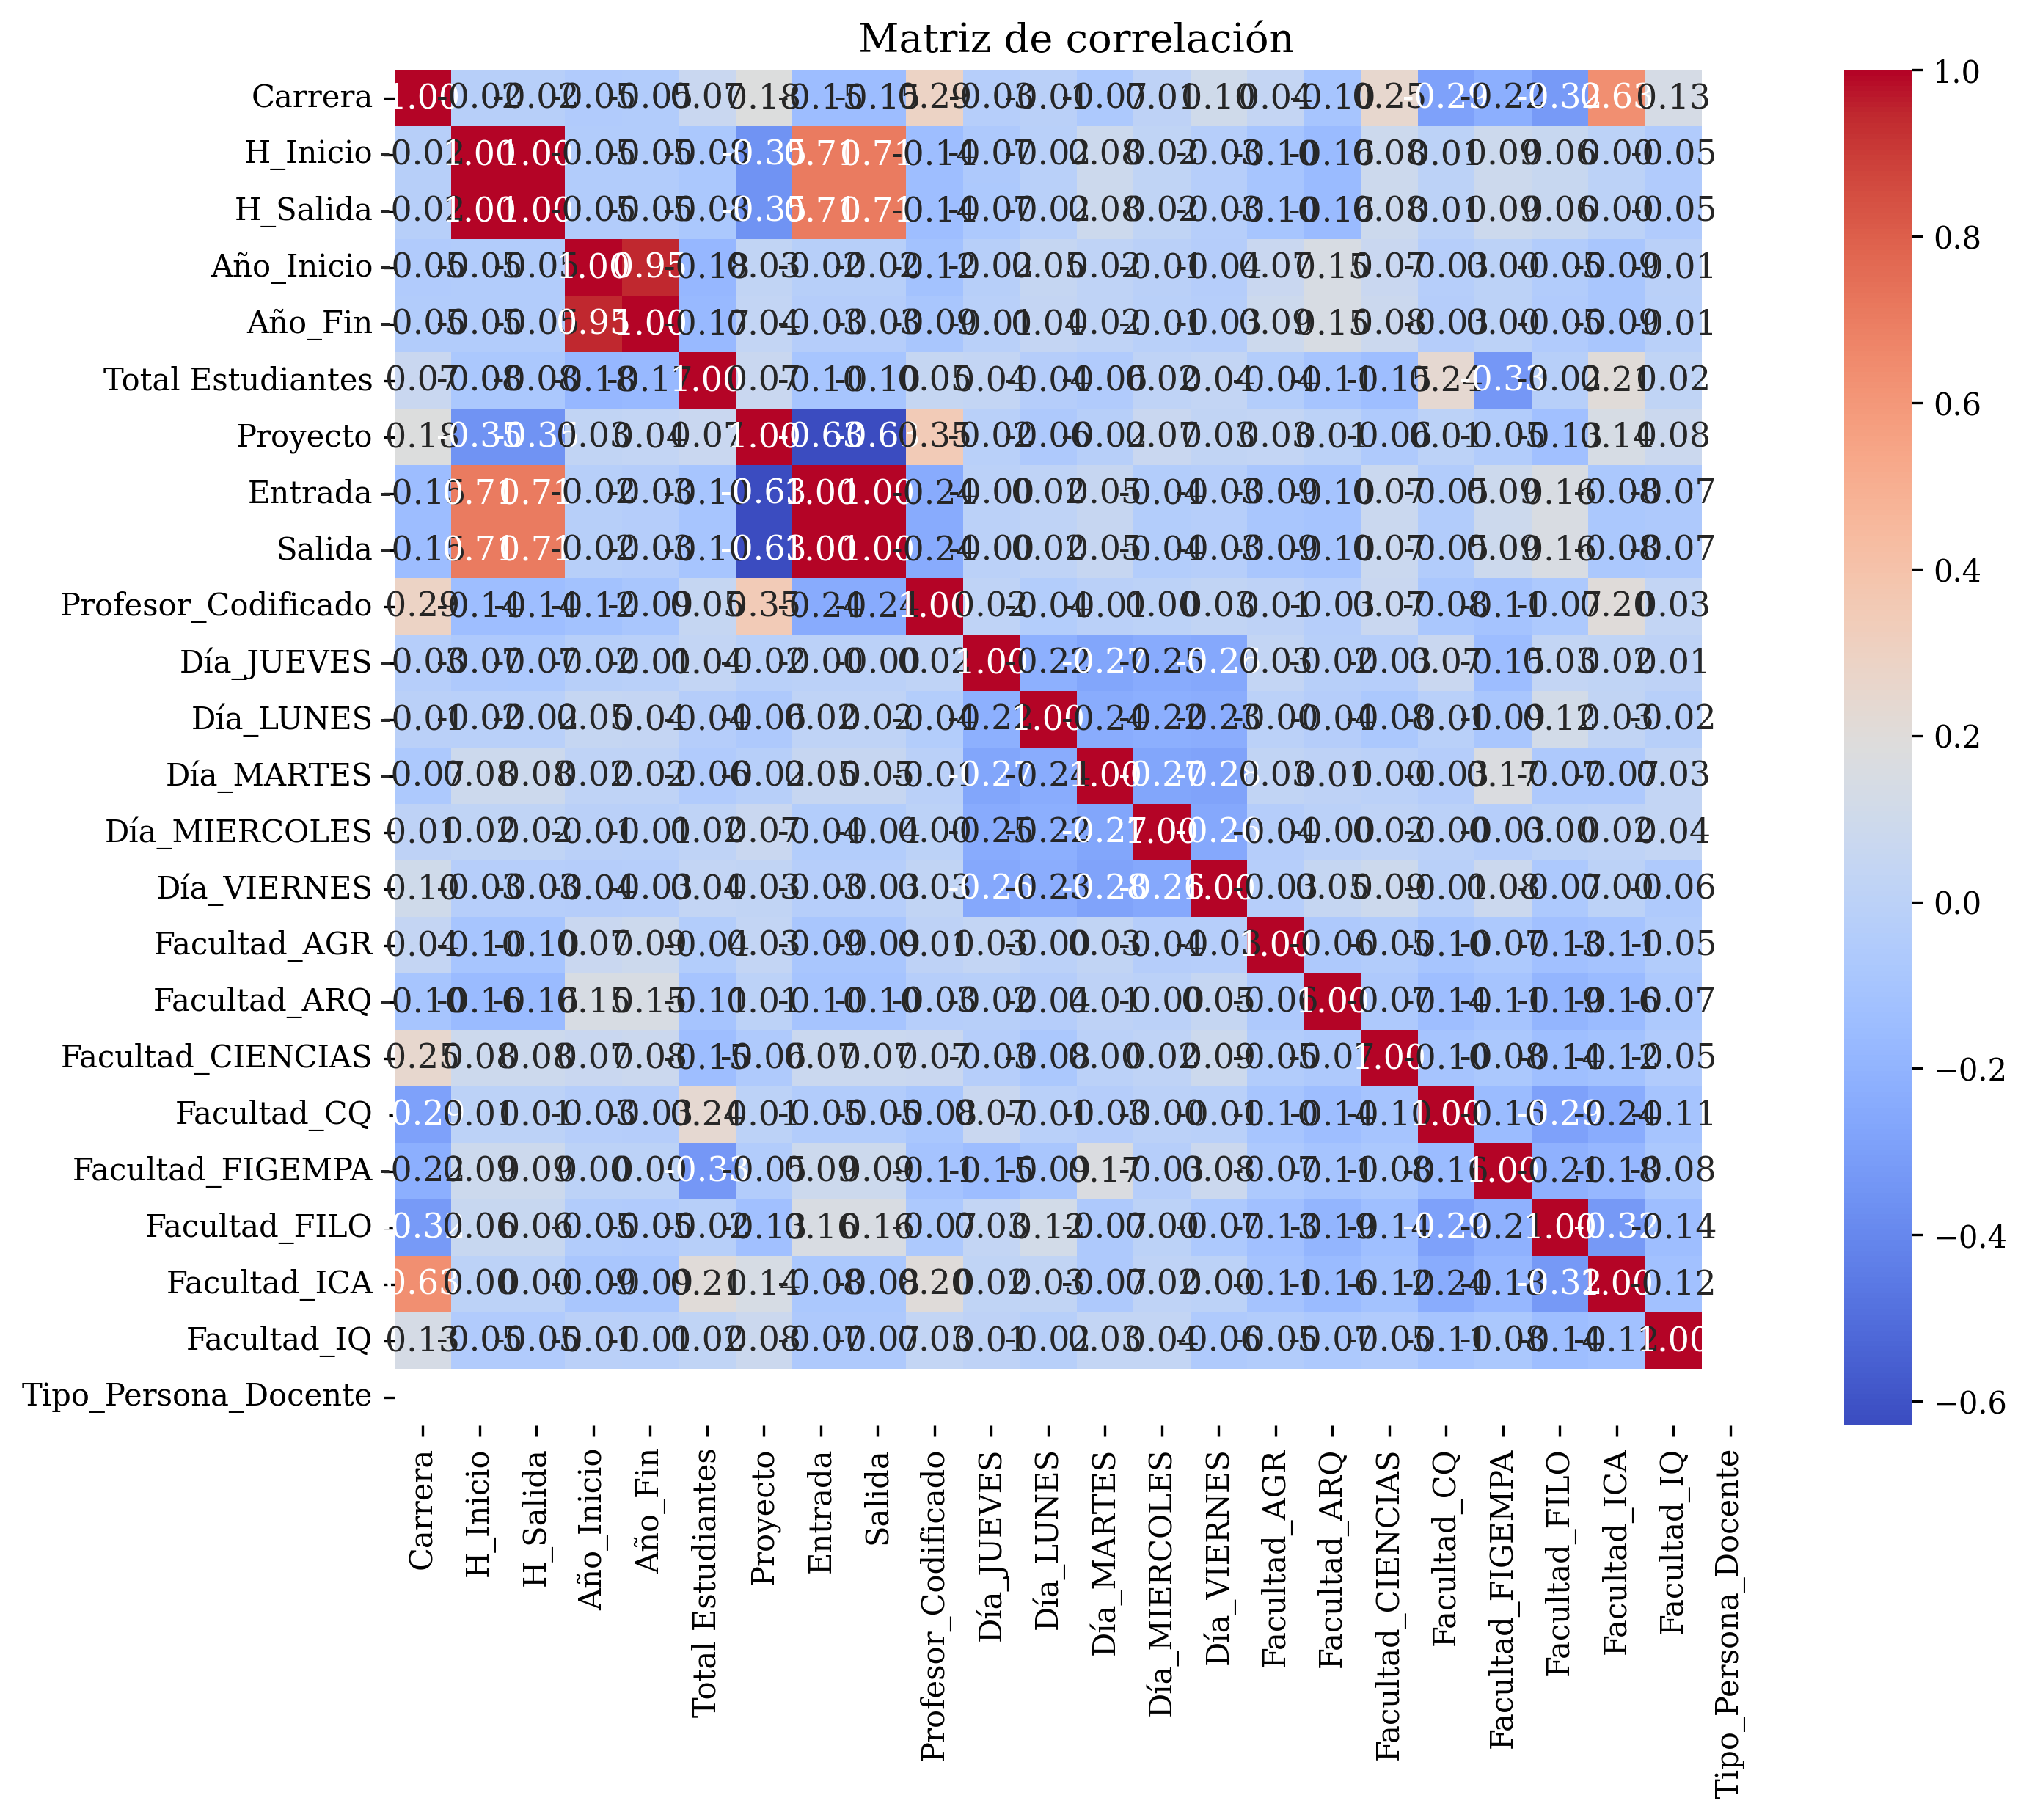

In [10]:
corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()


In [11]:
# Eliminar las columnas relacionadas con el tipo de persona
df_encoded.drop(columns=['Tipo_Persona_Docente'], inplace=True)

# Verificar las columnas restantes
df_encoded.columns

Index(['Carrera', 'H_Inicio', 'H_Salida', 'Año_Inicio', 'Año_Fin',
       'Total Estudiantes', 'Proyecto', 'Entrada', 'Salida',
       'Profesor_Codificado', 'Día_JUEVES', 'Día_LUNES', 'Día_MARTES',
       'Día_MIERCOLES', 'Día_VIERNES', 'Facultad_AGR', 'Facultad_ARQ',
       'Facultad_CIENCIAS', 'Facultad_CQ', 'Facultad_FIGEMPA', 'Facultad_FILO',
       'Facultad_ICA', 'Facultad_IQ'],
      dtype='object')

Del analisis de la correlación se elimina las variables correspondientes a tipo persona ya que tienen la más alta correlación y su integración no garantiza un aporte significativo en la predicción

In [12]:
# Conjunto de validación: Año_Inicio = 2024 y Año_Fin = 2025
df_val = df_encoded[(df_encoded['Año_Inicio'] == 2024) & (df_encoded['Año_Fin'] == 2025)]

# Conjunto de entrenamiento: todos los demás
df_train = df_encoded[~((df_encoded['Año_Inicio'] == 2024) & (df_encoded['Año_Fin'] == 2025))]

In [13]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras y objetivo
X = df_encoded.drop(columns=['Profesor_Codificado'])
y = df_encoded['Profesor_Codificado']


In [14]:
# Contar cuántas veces aparece cada clase (profesor codificado)
conteo_profesores = y.value_counts()

# Filtrar clases con menos de 5 muestras
clases_menores_5 = conteo_profesores[conteo_profesores < 5]

# Mostrar resultado
print("Profesores con menos de 5 muestras:")
print(clases_menores_5)

Profesores con menos de 5 muestras:
Series([], Name: count, dtype: int64)


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Modelos que requieren escalado
modelos_con_escalado = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighbors': KNeighborsClassifier(),
    'SVC': SVC()
}

# Modelos que no requieren escalado
modelos_sin_escalado = {
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

# Evaluar modelos con escalado
resultados = {}

for nombre, modelo in modelos_con_escalado.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', modelo)
    ])
    score = cross_val_score(pipeline, X, y, cv=4, scoring='accuracy').mean()
    resultados[nombre] = round(score, 4)

# Evaluar modelos sin escalado
for nombre, modelo in modelos_sin_escalado.items():
    score = cross_val_score(modelo, X, y, cv=4, scoring='accuracy').mean()
    resultados[nombre] = round(score, 4)

# Mostrar resultados
for modelo, score in sorted(resultados.items(), key=lambda x: x[1], reverse=True):
    print(f"{modelo}: {score}")

SVC: 0.3253
RandomForest: 0.3252
LogisticRegression: 0.3065
GradientBoosting: 0.2583
DecisionTree: 0.2503
KNeighbors: 0.2437


In [16]:
X = df_train.drop(columns=['Profesor_Codificado'])
y = df_train['Profesor_Codificado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características (muy importante para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV
# Definición del modelo base
svc = SVC()

# Grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularización
    'gamma': ['scale', 0.01, 0.1, 1], # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'],  # Tipo de kernel
    'degree': [2, 3, 4]             # Solo para kernel 'poly'
}

# Búsqueda de hiperparámetros
grid = GridSearchCV(svc, param_grid, refit=True, cv=5, verbose=1)
grid.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros encontrados:")
print(grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros encontrados:
{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Mejor modelo encontrado
svc_best = SVC(C=10, gamma=0.01, kernel='rbf', degree=2)
svc_best.fit(X_train, y_train)

# 5. Evaluación del modelo
y_pred = svc_best.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[5 0 1 0 0 0 3 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 3 1 1 0]
 [2 0 7 0 0 0 3 0 0 2 0 0 0 0]
 [0 0 0 4 0 3 0 0 0 0 0 0 0 0]
 [0 2 0 0 5 0 0 0 0 2 0 0 0 0]
 [0 0 0 6 0 5 0 0 0 0 0 0 0 0]
 [3 0 1 0 0 0 7 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 5 0 1 0 1 0 0]
 [0 4 0 0 0 0 0 2 0 0 3 0 2 0]
 [0 0 1 0 1 0 0 0 0 6 0 0 4 0]
 [0 1 0 0 0 0 0 0 0 2 3 1 0 0]
 [0 0 0 0 0 0 0 2 2 0 2 1 1 0]
 [0 3 0 0 1 0 0 1 1 1 3 1 1 0]
 [2 0 1 0 0 0 2 0 0 0 0 0 0 2]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.08      0.14      0.11         7
           2       0.64      0.50      0.56        14
           3       0.40      0.57      0.47         7
           4       0.71      0.56      0.62         9
           5       0.62      0.45      0.53        11
           6       0.47      0.64      0.54        11
           7       0.45      0.62      0.53         8
           8       0.00      0

In [22]:
X_val = df_val.drop(columns=['Profesor_Codificado'])
y_val = df_val['Profesor_Codificado']

X_val = scaler.transform(X_val)

y_val_pred = svc_best.predict(X_val)

print("Matriz de confusión (validación):")
print(confusion_matrix(y_val, y_val_pred))

print("\nReporte de clasificación (validación):")
print(classification_report(y_val, y_val_pred))

Matriz de confusión (validación):
[[2 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 1 0 0 2 0 0 0 0 2 0 0 0 0]
 [0 1 0 0 2 0 0 1 1 1 1 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 1 3 0 0 0 0]
 [0 0 0 3 0 4 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 4 0 0 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 0 1 0 0]
 [0 1 0 0 2 0 0 1 1 2 0 0 0 0]
 [0 0 0 2 0 1 0 0 0 0 0 0 0 0]
 [0 3 0 0 1 0 0 2 0 2 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 2 0 1 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 1]]

Reporte de clasificación (validación):
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.10      0.20      0.13         5
           2       0.00      0.00      0.00         7
           3       0.58      1.00      0.74         7
           4       0.23      0.43      0.30         7
           5       0.80      0.57      0.67         7
           6       0.33      0.57      0.42         7
           7       0.00      0.00      0.00         3
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


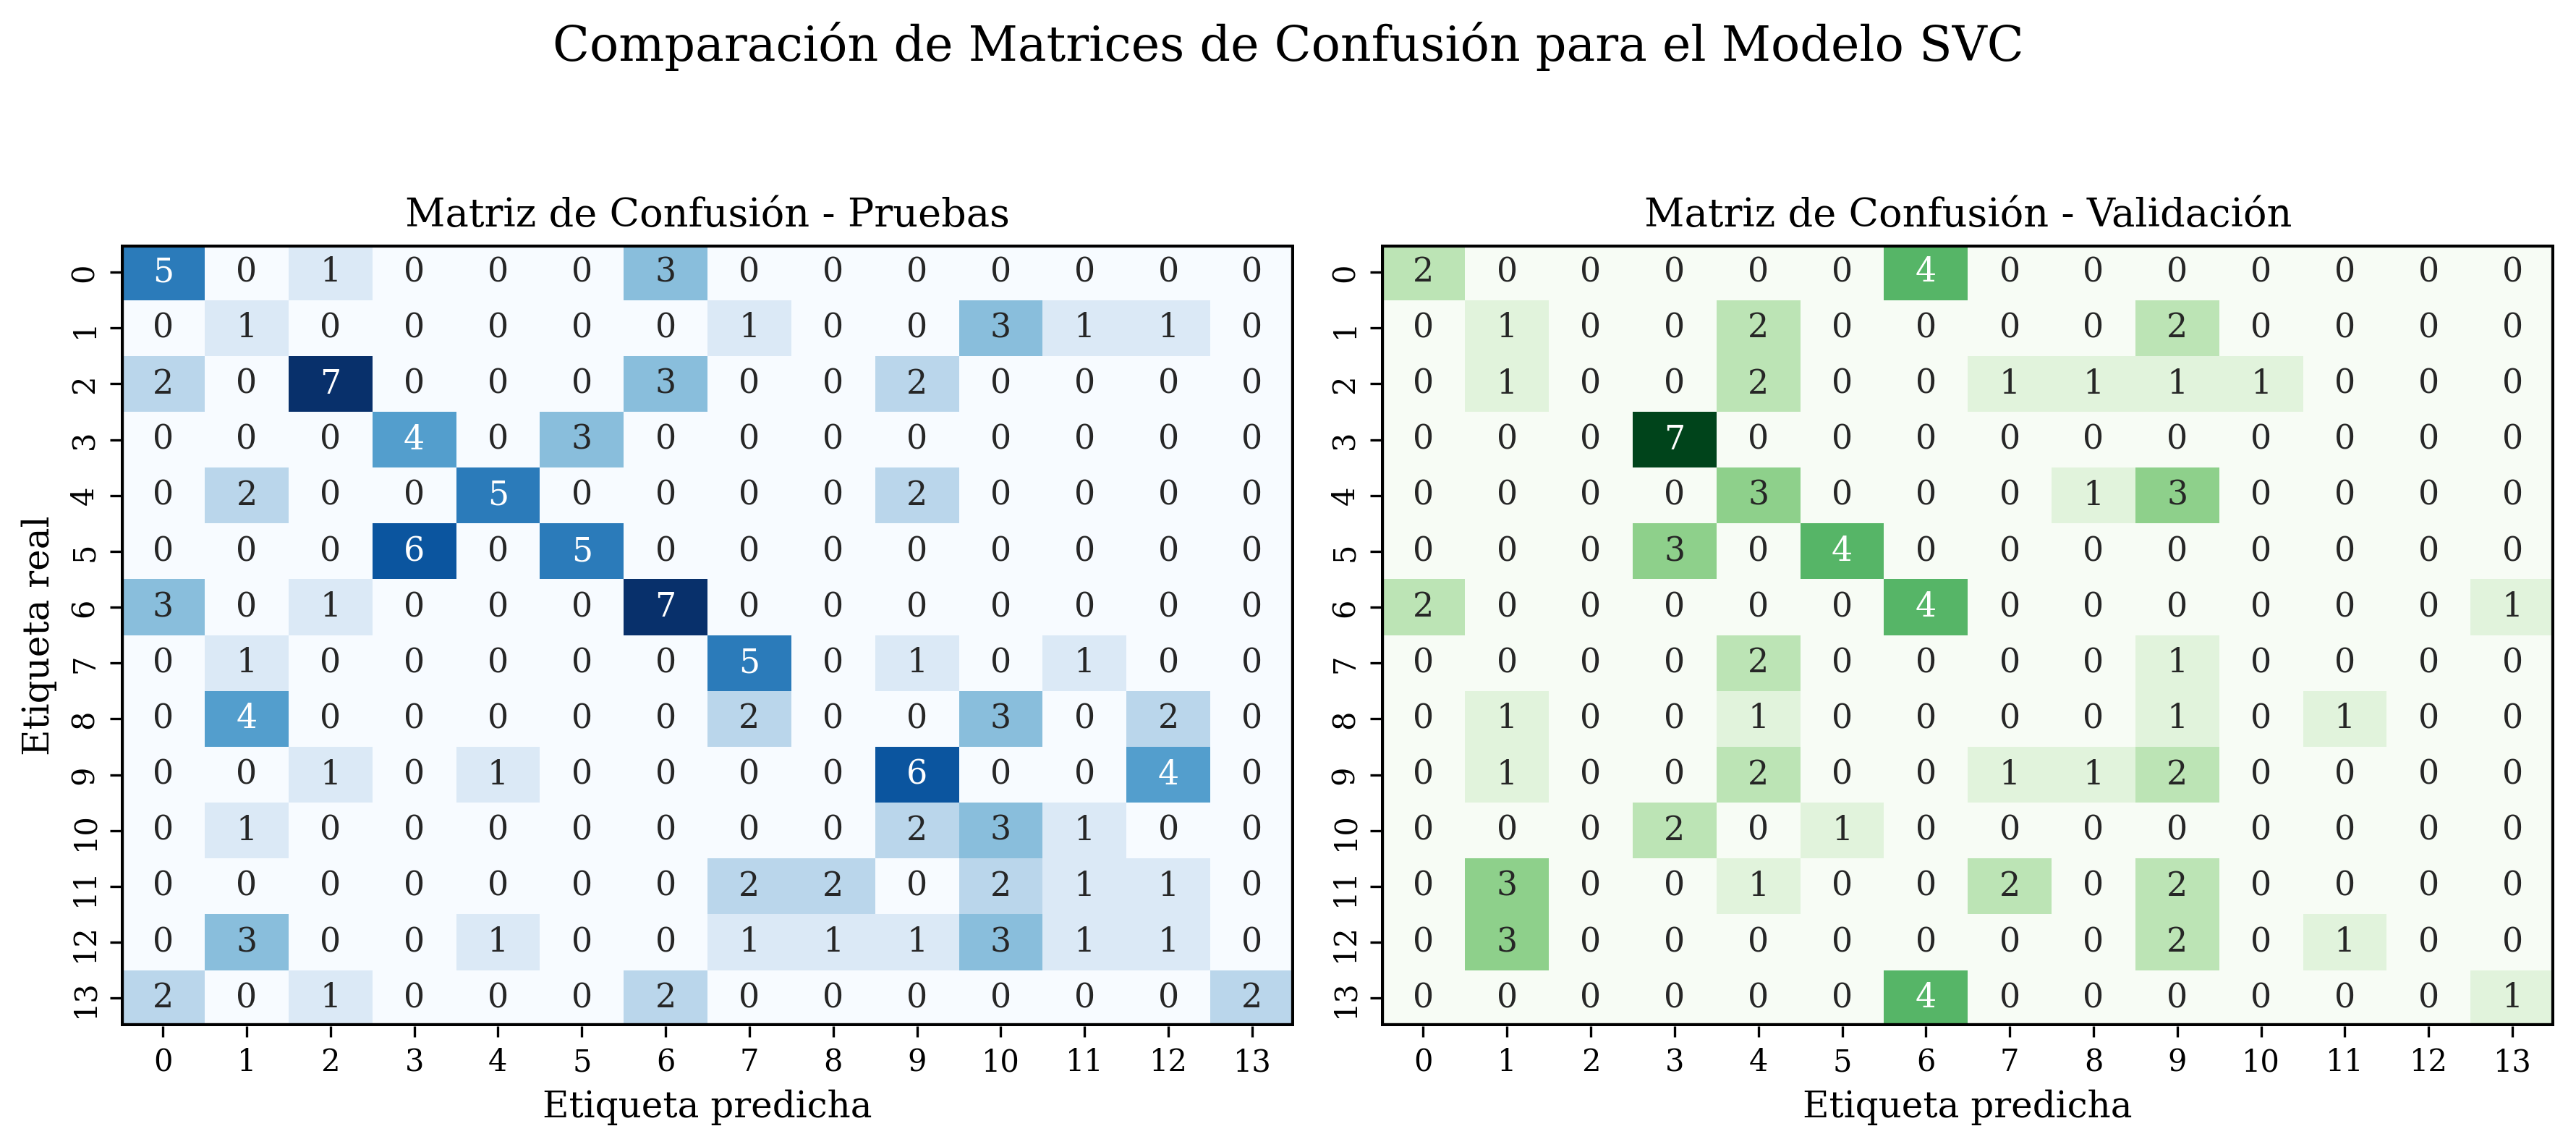

In [28]:
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Rectangle

# === Calcular matrices de confusión ===
cm_test = confusion_matrix(y_test, y_pred)
cm_val = confusion_matrix(y_val, y_val_pred)

# === Crear figura con subplots ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === Heatmap de Pruebas ===
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("Matriz de Confusión - Pruebas")
axes[0].set_xlabel("Etiqueta predicha")
axes[0].set_ylabel("Etiqueta real")
# Borde exterior negro
axes[0].add_patch(Rectangle((0, 0), cm_test.shape[1], cm_test.shape[0],
                            fill=False, edgecolor='black', linewidth=2))

# === Heatmap de Validación ===
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1])
axes[1].set_title("Matriz de Confusión - Validación")
axes[1].set_xlabel("Etiqueta predicha")
# Borde exterior negro
axes[1].add_patch(Rectangle((0, 0), cm_val.shape[1], cm_val.shape[0],
                            fill=False, edgecolor='black', linewidth=2))

# Título general
fig.suptitle("Comparación de Matrices de Confusión para el Modelo SVC", fontsize=16, y=1.05)

plt.tight_layout()
plt.show()